In [1]:
from collections import namedtuple
from typing import Optional
from pathlib import Path

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [2]:
DATA_DIR = Path("/Users/vladimirshitov/Documents/education/Bioinformatics_Institute/ImmunoMind_project/from_team/")


PBMC_1_10X_PATH = DATA_DIR / "df_pbmc1_10x_v2_processed_svm.csv"
PBMC_1_DROP_PATH = DATA_DIR / "df_pbmc1_drop_processed_svm.csv"
PBMC_2_10X_PATH = DATA_DIR / "df_pbmc2_10x_v2_processed_svm.csv"

TARGET = "CellType"

In [3]:
pbmc_1_10x = pd.read_csv(PBMC_1_10X_PATH).set_index("cells")
pbmc_1_10x

,RP5-1128N12.3,RP11-171G2.1,PKDREJ,BLACAT1,RP11-556I14.2,RPL32,KCNMB2,RPL13A,OR4N4,RPL34,...,CLEC1B,EIF1,RP1-102K2.8,GP9,ABLIM3,RP11-166N17.3,RP11-524F11.1,RP11-101E7.2,RPL18A,CellType
cells,,,,,,,,,,,,,,,,,,,,,
pbmc1_10x_v2_A_AAAGATGCAAAGTCAA,-0.01762,0.0,-0.030528,0.0,-0.01762,0.236545,0.0,0.304782,0.0,0.227559,...,-0.042173,0.382498,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.327312,0
pbmc1_10x_v2_A_AAAGCAAGTAGGAGTC,-0.01762,0.0,-0.030528,0.0,-0.01762,1.034161,0.0,0.201786,0.0,0.290946,...,-0.042173,0.431878,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.656094,0
pbmc1_10x_v2_A_AAAGCAATCGGTTCGG,-0.01762,0.0,-0.030528,0.0,-0.01762,0.426253,0.0,-4.456715,0.0,-0.068908,...,-0.042173,0.466779,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.103277,0
pbmc1_10x_v2_A_AAAGTAGTCATTTGGG,-0.01762,0.0,-0.030528,0.0,-0.01762,0.987770,0.0,0.142321,0.0,0.687382,...,-0.042173,0.557082,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.582226,0
pbmc1_10x_v2_A_AAAGTAGTCCGAGCCA,-0.01762,0.0,-0.030528,0.0,-0.01762,1.242410,0.0,-1.173258,0.0,0.834467,...,-0.042173,0.141116,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,1.325783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pbmc1_10x_v2_B_TCGCGTTCAAAGTCAA,-0.01762,0.0,-0.030528,0.0,-0.01762,0.386597,0.0,-0.004314,0.0,-0.308063,...,-0.042173,0.177718,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.832011,6
pbmc1_10x_v2_B_TGAAAGAGTCGCGAAA,-0.01762,0.0,-0.030528,0.0,-0.01762,0.808475,0.0,0.502082,0.0,0.253961,...,-0.042173,0.034980,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,1.045143,7
pbmc1_10x_v2_B_TGTGTTTCATGCATGT,-0.01762,0.0,-0.030528,0.0,-0.01762,0.653090,0.0,-0.217025,0.0,-0.081840,...,-0.042173,0.456612,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.877768,6


In [4]:
pbmc_2_10x = pd.read_csv(PBMC_2_10X_PATH).set_index("cells")
pbmc_2_10x

,RP5-1128N12.3,RP11-171G2.1,PKDREJ,BLACAT1,RP11-556I14.2,RPL32,KCNMB2,RPL13A,OR4N4,RPL34,...,CLEC1B,EIF1,RP1-102K2.8,GP9,ABLIM3,RP11-166N17.3,RP11-524F11.1,RP11-101E7.2,RPL18A,CellType
cells,,,,,,,,,,,,,,,,,,,,,
pbmc2_10X_V2_AAACCTGAGATGGGTC,-0.01762,0.0,-0.030528,0.0,-0.01762,1.003276,0.0,0.479661,0.0,0.607435,...,-0.042173,-0.507631,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.967635,5
pbmc2_10X_V2_AAACCTGAGCGTAATA,-0.01762,0.0,-0.030528,0.0,-0.01762,0.951827,0.0,1.001209,0.0,0.524792,...,-0.042173,-0.837248,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.967635,5
pbmc2_10X_V2_AAACCTGAGCTAGGCA,-0.01762,0.0,-0.030528,0.0,-0.01762,0.810825,0.0,0.608176,0.0,0.170900,...,-0.042173,0.144149,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.723335,2
pbmc2_10X_V2_AAACCTGAGGGTCTCC,-0.01762,0.0,-0.030528,0.0,-0.01762,0.662872,0.0,0.323684,0.0,0.075692,...,-0.042173,-0.046487,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.859237,1
pbmc2_10X_V2_AAACCTGGTCCGAACC,-0.01762,0.0,-0.030528,0.0,-0.01762,1.086766,0.0,0.499821,0.0,0.791950,...,-0.042173,-0.846165,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.735692,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pbmc2_10X_V2_TTTGTCACACGTCTCT,-0.01762,0.0,-0.030528,0.0,-0.01762,1.014367,0.0,0.681298,0.0,0.844131,...,-0.042173,-0.421049,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,1.171969,5
pbmc2_10X_V2_TTTGTCACAGCCAATT,-0.01762,0.0,-0.030528,0.0,-0.01762,0.233719,0.0,-0.833770,0.0,0.244566,...,-0.042173,0.276007,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.223666,2
pbmc2_10X_V2_TTTGTCAGTACGCACC,-0.01762,0.0,-0.030528,0.0,-0.01762,-2.588569,0.0,-4.456715,0.0,-3.872194,...,-0.042173,-2.321578,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,-2.304526,7


In [5]:
pbmc_1_drop = pd.read_csv(PBMC_1_DROP_PATH).set_index("cells")
pbmc_1_drop

,RP5-1128N12.3,RP11-171G2.1,PKDREJ,BLACAT1,RP11-556I14.2,RPL32,KCNMB2,RPL13A,OR4N4,RPL34,...,CLEC1B,EIF1,RP1-102K2.8,GP9,ABLIM3,RP11-166N17.3,RP11-524F11.1,RP11-101E7.2,RPL18A,CellType
cells,,,,,,,,,,,,,,,,,,,,,
pbmc1_Drop_AAAAGATGTGGT,-0.01762,0.0,-0.030528,0.0,-0.01762,0.151350,0.0,0.291968,0.0,0.352809,...,-0.042173,0.538113,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.056209,7
pbmc1_Drop_AAAAGGATTTCC,-0.01762,0.0,-0.030528,0.0,-0.01762,0.756594,0.0,0.517785,0.0,0.060344,...,-0.042173,0.252500,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,-2.304526,2
pbmc1_Drop_AAAAGTGTTTAA,-0.01762,0.0,-0.030528,0.0,-0.01762,0.629515,0.0,-0.004276,0.0,0.187513,...,-0.042173,0.351329,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.515672,2
pbmc1_Drop_AAAATGATGTAT,-0.01762,0.0,-0.030528,0.0,-0.01762,0.407930,0.0,0.269739,0.0,-0.376622,...,-0.042173,0.850211,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,1.042299,2
pbmc1_Drop_AAACAAACCGAC,-0.01762,0.0,-0.030528,0.0,-0.01762,0.058069,0.0,0.032035,0.0,-0.533383,...,-0.042173,0.641281,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,-0.244477,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pbmc1_Drop_TCCACGCAAAGA,-0.01762,0.0,-0.030528,0.0,-0.01762,-0.447085,0.0,0.565932,0.0,-0.101248,...,-0.042173,-0.180648,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,-2.304526,4
pbmc1_Drop_TGAACACCCAGT,-0.01762,0.0,-0.030528,0.0,-0.01762,0.149105,0.0,0.349660,0.0,0.619208,...,-0.042173,0.101747,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.054061,4
pbmc1_Drop_TGGCCGTCAATA,-0.01762,0.0,-0.030528,0.0,-0.01762,-2.588569,0.0,0.169841,0.0,0.323683,...,-0.042173,0.283802,0.0,-0.0803,-0.034545,0.0,0.0,-0.01762,0.539177,4


In [6]:
ADATA_PATH = "/Users/vladimirshitov/Documents/education/Bioinformatics_Institute/ImmunoMind_project/1_SC_introduction/write/pbmc3k.h5ad"

In [7]:
adata = sc.read(ADATA_PATH)
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
cell_types = adata.obs["leiden"]
cell_types

AAACATACAACCAC-1             CD8 T
AAACATTGAGCTAC-1                 B
AAACATTGATCAGC-1             CD4 T
AAACCGTGCTTCCG-1    CD14 Monocytes
AAACCGTGTATGCG-1                NK
                         ...      
TTTCGAACTCTCAT-1    CD14 Monocytes
TTTCTACTGAGGCA-1                 B
TTTCTACTTCCTCG-1                 B
TTTGCATGAGAGGC-1                 B
TTTGCATGCCTCAC-1             CD4 T
Name: leiden, Length: 2638, dtype: category
Categories (8, object): ['CD4 T', 'CD14 Monocytes', 'B', 'CD8 T', 'NK', 'FCGR3A Monocytes', 'Dendritic', 'Megakaryocytes']

In [9]:
def cluster_centroids(cell_types, cells_data):
    unique_types = np.unique(cell_types)
    
    centroids = {}  # Map from cluster names to the centroids
    
    for cell_type in unique_types:
        cluster_data = cells_data[cell_types == cell_type, :]
        centroids[cell_type] = cluster_data.mean(axis=0)
        
    return centroids


def clusters_cells_correlations(cells_data, centroids):
    cells_correlations = []

    for cell in cells_data:
        cell_cluster_correlation = np.array(
            [np.corrcoef(cell, centroid)[0, 1] for centroid in centroids.values()])

        cells_correlations.append(cell_cluster_correlation)

    return np.array(cells_correlations)


def learn_thresholds(cell_types, cells_data, centroids):
    thresholds = {}  # Map from cell types to the threshold
    
    correlations = clusters_cells_correlations(cells_data, centroids)
    
    for i, cell_type in enumerate(centroids.keys()):
        cluster_cells_correlations = correlations[cell_types == cell_type, i]
        thresholds[cell_type] = np.percentile(cluster_cells_correlations, 1)
        
    return thresholds


def feature_cluster(expression_profile: pd.DataFrame, sample_information: pd.DataFrame) -> pd.DataFrame:
    """
    
    Returns
    -------
    Table where rows are cell types and columns are genes with mean gene expression in each cluster
    """
    
    assert all(expression_profile.index == sample_information.index)
    
    expression_profile["cell_type"] = sample_information["cell_type"]
     
    return expression_profile.groupby("cell_type").aggregate("mean")


def add_noise(matrix, std=1e-4):
    """Add random normal noise to `matrix` to avoid multicollinearity"""
    return matrix + np.random.normal(0, std, size=matrix.shape)

In [10]:
class DCA:
    """Discriminative Component Analysis data transformer
    
    Python implementaion of code from R package dml: https://rdrr.io/cran/dml/src/R/dca.R
    Reference publication: https://ink.library.smu.edu.sg/sis_research/2392/
    
    Parameters
    ----------
    dimensions : Optional[int] = None
        When not provided, DCA runs on the original data dimension.
        When given, dimension is reduced to `dimensions`
    noise_std : float = 1e-9
        If set, the random normal noise with standard deviation `noise_std` is added to the data
        during the fitting of transformation matrix. It helps to avoid multicollinearity
    debug : bool = False
        If set True, some debug messages are thrown as warnings
    
    """
    def __init__(self, dimensions: Optional[int] = None, noise_std: float = 1e-9, debug: bool = False):
        self.dimensions = dimensions
        self.noise_std = noise_std
        self.debug = debug
        
        self.dca = None
        self.transformed_data = None
        self.mahalanobis_matrix = None
        self.dca_transformation_matrix = None
        self.classes = None
    
    def fit(self, X, y, negative_links=None):
        """
        Run discriminative component analysis on the data

        Parameters
        ----------
        X : 2D array-like
            (n, d) shape matrix, where n is the number of data points and d is the dimension of the data
        y : Optional array-like
            Vector of length n containing classes for each data point. -1 means, that class is unknown
        neglinks : Optional 2D array-like
            (s, s) shape matrix, describing the negative relationships between classes. 1 in the position
            (i, j) means that i'th and j'th classes have negative constraints. 0 means, that classes
            do not have negative constraints or we have no information about that

        Returns
        -------
        result : namedtuple with fields B, DCA, data, 
        - result.B: DCA suggested Mahalanobis matrix
        - result.DCA: DCA transormation of data
        - result.data: DCA transformed data

        For every two original data points (x1, x2) in result.data (y1, y2):
        (x2 - x1).T @ B @ (x2 - x1) = || (x2 - x1) @ A ||^2 = || y2 - y1 ||^2
        """
        if self.debug:
            from icecream import ic

        if self.noise_std:
            data = add_noise(X.T, std=self.noise_std)
        else:
            data = X.T

        d, n = data.shape

        if self.dimensions is None or self.dimensions < 1 or self.dimensions > d:
            self.dimensions = d
            
        if negative_links is None:
            negative_links = np.zeros(shape=(d, d))

        self.classes = np.unique(y[y != -1])
        n_classes = len(self.classes)

        # 1. Compute means for each class
        classes_means = np.zeros(shape=(d, n_classes))

        for i, class_name in enumerate(self.classes):
            class_observations = (y == class_name)
            classes_means[:, i] = np.mean(data[:, class_observations], axis=1)

        if self.debug:
            ic(self.classes)
            ic(n_classes)
            ic(classes_means)

        # 2. Compute Cb
        Cb = np.zeros(shape=(d, d))

        N_d = 0

        for j, class_name in enumerate(self.classes):
            negatives = np.where(negative_links[j, :] == 1)[0]

            for i in range(len(negatives)):
                col = (classes_means[:, j] - classes_means[:, negatives[i]]).reshape(-1, 1)

                Cb = Cb + col @ col.T

            N_d += sum(negatives)

        if N_d:
            Cb = Cb / N_d
        else:
            Cb = np.eye(d)

        if self.debug:
            ic(Cb)
            ic(N_d)

        # 3. Compute Cw

        Cw = np.zeros(shape=(d, d))
        N_w = 0

        for j, class_name in enumerate(self.classes):
            class_observations = np.where(y == class_name)[0]

            for i in range(len(class_observations)):
                col = (data[:, class_observations[i]] - classes_means[:, j]).reshape(-1, 1)
                Cw = Cw + col @ col.T

            N_w += sum(class_observations)

        if N_w:
            Cw = Cw / N_w
        else:
            Cw = np.eye(d)

        if self.debug:
            ic(Cw)
            ic(N_w)

        # 3. Diagonalize Cb
        Cb_eigenvalues, Cb_eigenvectors = np.linalg.eig(Cb)
        Cb_eigenvalues = Cb_eigenvalues.reshape(-1, 1)

        non_zero_values = (np.abs(Cb_eigenvalues) > 1e-9).flatten()

        R = Cb_eigenvectors[:, non_zero_values]
        R = R[:, : self.dimensions]

        Db = R.T @ Cb @ R
        Z = R @ fractional_matrix_power(Db, -0.5)

        if self.debug:
            ic(Cb_eigenvalues[:10])
            ic(Cb_eigenvectors)
            ic(R)
            ic(Db)
            ic(Z)

        # Diagonalize Z.T @ Cw @ Z
        Cz = Z.T @ Cw @ Z
        
        Cz_eigenvalues, Cz_eigenvectors = np.linalg.eig(Cz)

        Dw_inverse_root = np.diag(np.power(Cz_eigenvalues, -0.5))
        
        if self.debug:
            ic(Cz)
            ic(Cz_eigenvalues[:10])
            ic(Cz_eigenvectors)
            ic(Dw_inverse_root)

        self.dca_transformation_matrix = Dw_inverse_root @ Cz_eigenvectors.T @ Z.T
        self.mahalanobis_matrix = self.dca_transformation_matrix.T @ self.dca_transformation_matrix

        if self.debug:
            ic(self.dca_transformation_matrix)
            ic(self.mahalanobis_matrix)
        
    def transform(self, X):
        return X @ self.dca_transformation_matrix.T
    

In [11]:
dca = DCA()

dca.fit(adata.X, cell_types.to_numpy())

In [12]:
transformed_data = dca.transform(adata.X)

In [13]:
centroids = cluster_centroids(cell_types, transformed_data)
centroids

{'B': array([ 24.62580019, -17.63326648,  -6.42357473, ...,  -6.07688582,
         -3.01052841,  -6.96024499]),
 'CD14 Monocytes': array([-76.11638768, 117.12269613,   9.96323611, ...,   2.88892339,
         -9.66173861, -11.82906805]),
 'CD4 T': array([ 47.13380938, -20.82005454,  -9.03633209, ...,   4.31259994,
          6.62653137,   4.86053058]),
 'CD8 T': array([ -0.25900353, -62.40633505,  -0.11423718, ...,  -4.75286026,
          7.88698746,  -4.03274524]),
 'Dendritic': array([-25.65373938,  44.64876749,  29.47390417, ...,   0.49841735,
        -21.29845799, -31.61640304]),
 'FCGR3A Monocytes': array([-79.45944588,  83.69919805,   6.63751102, ..., -10.5341276 ,
         -5.18141349,  37.76434411]),
 'Megakaryocytes': array([  24.41068099,  -39.71111131,  -12.87301768, ...,  121.78150652,
        -153.98813663,  209.29584983]),
 'NK': array([ -78.2488698 , -119.30579762,   41.19230074, ...,  -37.10873984,
          -5.50932874,    3.29255288])}

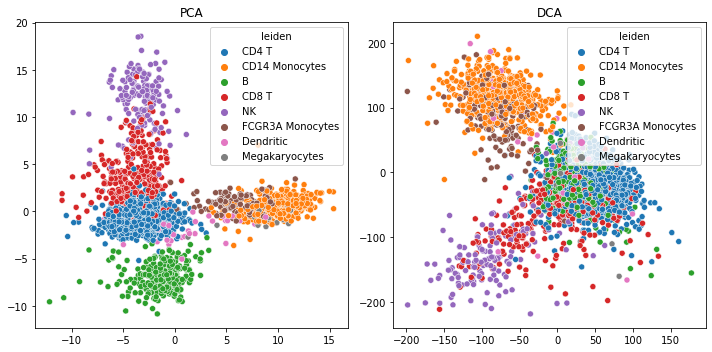

In [14]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=2)

sns.scatterplot(x=adata.obsm["X_pca"][:, 0], y=adata.obsm["X_pca"][:, 1], hue=cell_types, ax=axes[0])
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], hue=cell_types, ax=axes[1])

axes[0].set_title("PCA")
axes[1].set_title("DCA")

fig.tight_layout()

In [15]:
cells_correlations = clusters_cells_correlations(transformed_data, centroids)

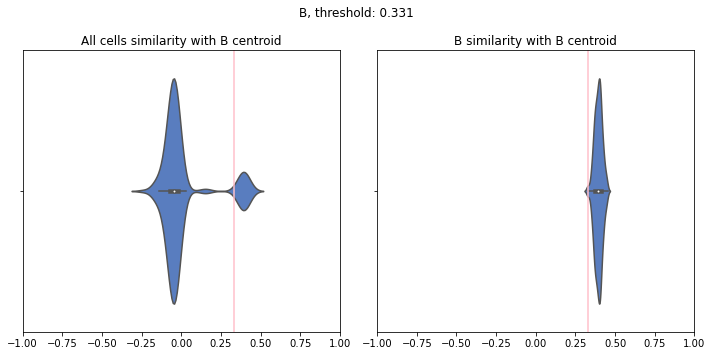

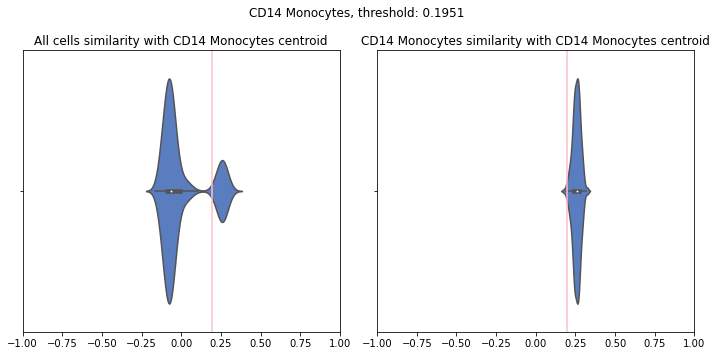

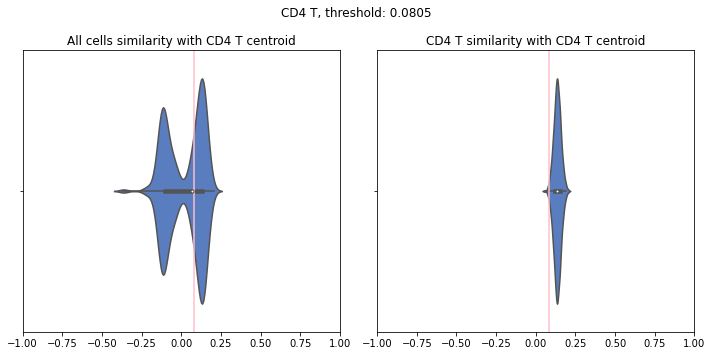

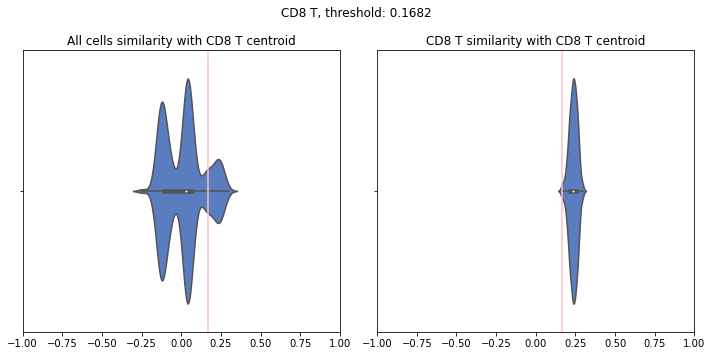

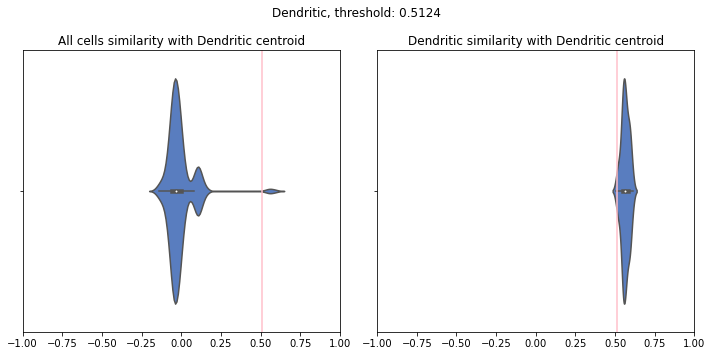

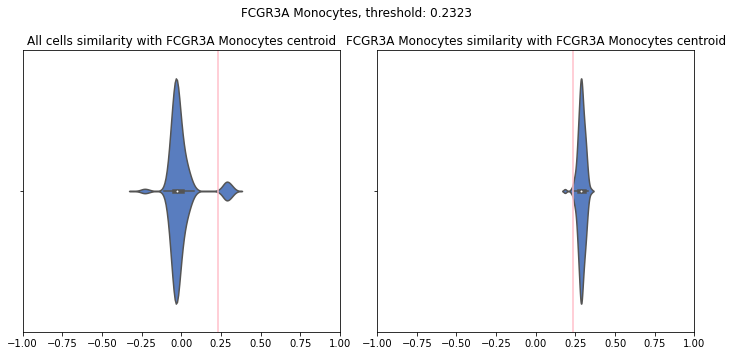

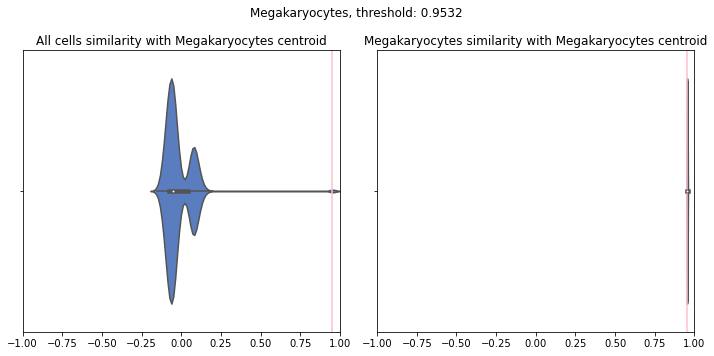

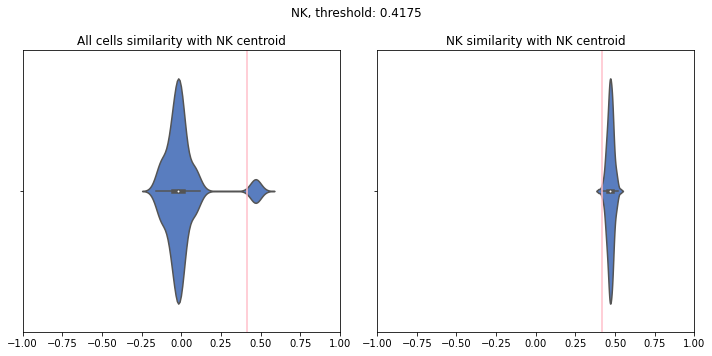

In [16]:
for i, cell_type in enumerate(centroids.keys()):
    fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
    
    sns.violinplot(x=cells_correlations[:, i], ax=axes[0], palette="muted")
    
    cluster_cells_correlations = cells_correlations[cell_types == cell_type, i]
    sns.violinplot(x=cluster_cells_correlations, ax=axes[1], palette="muted")
    
    axes[0].set_xlim(-1, 1)
    axes[1].set_xlim(-1, 1)
    
    axes[0].set_title(f"All cells similarity with {cell_type} centroid")
    axes[1].set_title(f"{cell_type} similarity with {cell_type} centroid")
    
    threshold = np.percentile(cluster_cells_correlations, 1)
    
    axes[0].axvline(threshold, color="pink")
    axes[1].axvline(threshold, color="pink")
    
    fig.suptitle(f"{cell_type}, threshold: {round(threshold, 4)}")
    fig.tight_layout()
    plt.show()

In [17]:
thresholds = learn_thresholds(cell_types, cells_data=transformed_data, centroids=centroids)
thresholds

{'B': 0.33100053018852726,
 'CD14 Monocytes': 0.19506458610901561,
 'CD4 T': 0.08048994199507668,
 'CD8 T': 0.1682394543035318,
 'Dendritic': 0.512355772652826,
 'FCGR3A Monocytes': 0.2322559111105128,
 'Megakaryocytes': 0.9532262879641141,
 'NK': 0.41748357869811503}

In [18]:
centroids

{'B': array([ 24.62580019, -17.63326648,  -6.42357473, ...,  -6.07688582,
         -3.01052841,  -6.96024499]),
 'CD14 Monocytes': array([-76.11638768, 117.12269613,   9.96323611, ...,   2.88892339,
         -9.66173861, -11.82906805]),
 'CD4 T': array([ 47.13380938, -20.82005454,  -9.03633209, ...,   4.31259994,
          6.62653137,   4.86053058]),
 'CD8 T': array([ -0.25900353, -62.40633505,  -0.11423718, ...,  -4.75286026,
          7.88698746,  -4.03274524]),
 'Dendritic': array([-25.65373938,  44.64876749,  29.47390417, ...,   0.49841735,
        -21.29845799, -31.61640304]),
 'FCGR3A Monocytes': array([-79.45944588,  83.69919805,   6.63751102, ..., -10.5341276 ,
         -5.18141349,  37.76434411]),
 'Megakaryocytes': array([  24.41068099,  -39.71111131,  -12.87301768, ...,  121.78150652,
        -153.98813663,  209.29584983]),
 'NK': array([ -78.2488698 , -119.30579762,   41.19230074, ...,  -37.10873984,
          -5.50932874,    3.29255288])}

In [19]:
class CorrelationsPredictor:
    UNCERTAIN_CLASS_NAME = -1
    
    def __init__(self, noise_std=1e-4, debug=False):
        self.debug = debug
        self.noise_std = noise_std
        
        self.dimensions = None
        self.dca = None
        self.cell_types = None
        self.classes_centroids = None
        self.thresholds = None
    
    def fit(self, X, y, negative_links=None, dimensions: Optional[int] = None):
        self.dimensions = dimensions
        self.cell_types = np.unique(y)

        self.dca = DCA(self.dimensions, self.noise_std, self.debug)
        self.dca.fit(X, y, negative_links)
        
        transformed_data = self.dca.transform(X)
        
        self.classes_centroids = cluster_centroids(y, transformed_data)
        self.thresholds = learn_thresholds(y, transformed_data, self.classes_centroids)
        
    
    def predict(self, X):
        transformed_data = self.dca.transform(X)
        
        predicted_cell_types = []
        
        for cell in transformed_data:
            max_corr = -np.inf
            best_type = None
            
            for cell_type in self.cell_types:
                correlation = np.corrcoef(cell, self.classes_centroids[cell_type])[0, 1]
                
                if correlation > max_corr and correlation > self.thresholds[cell_type]:
                    max_corr = correlation
                    best_type = cell_type
                    
            if best_type is None:
                best_type = self.UNCERTAIN_CLASS_NAME
                
            predicted_cell_types.append(best_type)
            
        return np.array(predicted_cell_types)

In [20]:
predictor = CorrelationsPredictor()
predictor.fit(adata.X, cell_types)

In [21]:
predictor.thresholds

{'B': 0.3309727306893426,
 'CD14 Monocytes': 0.19485565393639634,
 'CD4 T': 0.08090727493678027,
 'CD8 T': 0.16943611106541856,
 'Dendritic': 0.5120988147613779,
 'FCGR3A Monocytes': 0.23224854224216163,
 'Megakaryocytes': 0.9531933982535113,
 'NK': 0.4177682870013777}

In [22]:
predicted_classes = predictor.predict(adata.X)
pd.value_counts(predicted_classes)

CD4 T               1119
CD14 Monocytes       481
B                    337
CD8 T                324
NK                   154
FCGR3A Monocytes     149
Dendritic             35
-1                    27
Megakaryocytes        12
dtype: int64

In [23]:
def crossvalidate(data, dimensions=None):
    
    X = data.drop(TARGET, axis="columns").to_numpy()
    y = data[TARGET]

    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    
    scores = []

    for train_index, validation_index in kf.split(X):
        X_train, X_validation = X[train_index, :], X[validation_index, :]
        y_train, y_validation = y[train_index], y[validation_index]

        predictor = CorrelationsPredictor()
        predictor.fit(X_train, y_train, dimensions=dimensions)

        y_pred = predictor.predict(X_validation)
        scores.append(f1_score(y_validation, y_pred, average="macro"))
        
    return round(np.mean(scores), 4), round(np.std(scores), 4)

In [24]:
datasets = [
    (pbmc_1_10x, "PBMC_1_10X"),
    (pbmc_1_drop, "PBMC_dropseq"),
    (pbmc_2_10x, "PBMC_2_10x")
]

In [25]:
for dataset, name in datasets:
    mean_f1, std_f1 = crossvalidate(dataset)
    
    print(f"{name} f1 crossvalidation score:\t{mean_f1} ± {std_f1}")

PBMC_1_10X f1 crossvalidation score:	0.4624 ± 0.0856
PBMC_dropseq f1 crossvalidation score:	0.2226 ± 0.0561
PBMC_2_10x f1 crossvalidation score:	0.6635 ± 0.0177


In [28]:
for train_data, train_name in datasets:
    print(f"Training dataset: {train_name}")
    
    X_train = train_data.drop(TARGET, axis="columns").to_numpy()
    y_train = train_data[TARGET]
    
    predictor = CorrelationsPredictor()
    predictor.fit(X_train, y_train)
    
    print("Thresholds:")
    for cell_type, threshold in predictor.thresholds.items():
        print(cell_type, round(threshold, 4), sep=": ")
    
    for test_data, test_name in datasets:
        X_test = test_data.drop(TARGET, axis="columns").to_numpy()
        y_test = test_data[TARGET]

        y_pred = predictor.predict(X_test)
        score = f1_score(y_test, y_pred, average="macro")
        
        print(f"Score on dataset {test_name}:\t{round(score, 4)}")
        
    print("-" * 30)
    print()

Training dataset: PBMC_1_10X
Thresholds:
0: 0.9584
1: 0.959
2: 0.9581
3: 0.9762
4: 0.9981
5: 0.9587
6: 0.9584
7: 0.9585
8: 0.9582
Score on dataset PBMC_1_10X:	0.754
Score on dataset PBMC_dropseq:	0.5421
Score on dataset PBMC_2_10x:	0.7142
------------------------------

Training dataset: PBMC_dropseq
Thresholds:
0: 0.0621
1: 0.1946
2: -0.0103
3: 0.1121
4: 0.1764
5: 0.0313
6: 0.1235
7: -0.0547
8: 0.8012
Score on dataset PBMC_1_10X:	0.4308
Score on dataset PBMC_dropseq:	0.7109
Score on dataset PBMC_2_10x:	0.4551
------------------------------

Training dataset: PBMC_2_10x
Thresholds:
0: 0.9995
1: 0.9995
2: 0.9995
3: 0.9997
4: 0.9995
5: 0.9995
6: 0.9995
7: 0.9995
8: 0.9995
Score on dataset PBMC_1_10X:	0.5803
Score on dataset PBMC_dropseq:	0.3764
Score on dataset PBMC_2_10x:	0.7966
------------------------------

